# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [65]:
import pandas as pd# Importe as bibliotecas

In [66]:
df_instacart = pd.read_csv('/datasets/instacart_orders.csv', sep=';') 
df_products = pd.read_csv('/datasets/products.csv', sep=';') 
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departaments = pd.read_csv('/datasets/departments.csv', sep=';') 
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')# leia os conjuntos de dados em DataFrames

In [67]:
df_instacart.info()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [68]:
df_products.info()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [69]:
df_aisles.info()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [70]:
df_departaments.info()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [71]:
df_order_products.info(show_counts=True )# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

1. Os csv estão separados por ';' o que dificulta a manupulação dos dados, foi necessário utilizar sep=';', para facilitar a verificação do DF.


#### Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

1. verificar qual é o tipo das colunas de id
2. fazer a conversão usando astype('int') das colunas que não tiverem o tipo int
3. usar o metodo isnull().sum()) para verificar os valores ausentes e    para preencher os valores ausentes
4. utilizar o metodo para identificar os valores duplicados e     para remover os valores duplicados sem perder informações no conjunto de dados


## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [72]:
# Verificar se há pedidos duplicados
print(df_instacart.duplicated().sum())#há valores duplicados

15


Há linhas duplicadas? Se sim, o que elas têm em comum?

Sim 

In [73]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras



O que esse resultado quer dizer?

In [74]:
#Código gerado pela revisora - número de linhas no dataframe antes da remoção 
len(df_instacart)

478967

In [75]:
#removendo os valores duplicados
df_instacart_cleaned = df_instacart.drop_duplicates()



<div class="alert alert-block alert-danger">
<b>Comentário: </b> <a class="tocSkip"></a>
    
É necessário ajustar o código acima. Perceba que o enunciado solicita a remoção de valores duplicados, no entanto foram removidos todos os valores de `days_since_pior_order`duplicados. Ou seja, os pedidos diferentes que apresentavam o mesmo `days_since_prior_order`, acabaram sendo deletados por conta do argumento `subset`. Para remover apenas os duplicados necessários, por favor ajuste o código para: 
    
    
```python
    orders_df_cleaned = orders_df.drop_duplicates()
```
    
Após esse ajuste, rode novamente o código da análise para você ver os resultados corretos com o dataframe ajustado.

In [76]:
#Código gerado pela revisora - número de linhas no dataframe após remoção 
len(df_instacart_cleaned)

478952

In [77]:
# Verifique as linhas duplicadas mais uma vez
#verificando se os valores foram removidos
print(df_instacart_cleaned.duplicated().sum())# Remova pedidos duplicados

0


In [78]:
#verificando as linhas
print(df_instacart_cleaned[df_instacart_cleaned.duplicated()])# Verifique novamente apenas os IDs de pedidos duplicados

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.

Após feita a fitlragem inicial, foram verificados, valores ausentes e após, valores duplicados.
Foi feita a remoção dos valores duplicados, conforme solicitado pela revisora uma vez que utilizei um metodo que eliminaria apernas os valores de uma coluna específica.
Foi gerado um novo data frame para salvar o resultado, considerando que a alteração que foi feita não alterou o data frame original

### DataFrame `products`

In [79]:
print(f"Linhas completamente duplicadas: {df_products.duplicated().sum()}")# Verifique se há linhas completamente duplicadas
print(df_products[df_products.duplicated()].head())

Linhas completamente duplicadas: 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [80]:
print(f"IDs de produtos duplicados: {df_products['product_id'].duplicated().sum()}")# Verifique apenas IDs dos produtos duplicados
print(df_products[df_products['product_id'].duplicated(keep=False)].sort_values('product_id'))

IDs de produtos duplicados: 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [81]:
print(f"Nomes de produtos duplicados: {df_products['product_name'].str.lower().duplicated().sum()}")# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
duplicated_names = df_products[df_products['product_name'].str.lower().duplicated(keep=False)]


Nomes de produtos duplicados: 1361


In [82]:
non_null_duplicates = df_products.dropna(subset=['product_name'])
print(non_null_duplicates[non_null_duplicates['product_name'].str.lower().duplicated(keep=False)])# Verifique os nomes de produtos duplicados que não estão faltando

       product_id                                     product_name  aisle_id  \
41             42                                  Biotin 1000 mcg        47   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
515           516                           American Cheese Slices        21   
1538         1539                                 Cauliflower head        83   
1783         1784              NUTrition Protein Mix Blueberry Nut       117   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
41              

Descreva brevemente suas conclusões e o que você fez com elas.
1.verifiquei os valores duplicados
2.verifiquei o numero de ids duplicados
3.a surpresa veio quando eu percebi que não retornou com valor anteiormente por causa das letras mauisculas


### DataFrame `departments`

In [83]:
print(df_departaments.duplicated().sum())# Verifique se há linhas completamente duplicadas


0


In [84]:
print(f"ID duplicados: {df_departaments['department_id'].duplicated().sum()}")# Verifique apenas se há IDs dos produtos duplicados

ID duplicados: 0


Descreva brevemente suas conclusões e o que você fez com elas.

.verifiquyei se tinha linhas e ids duplicados.
ambos retornaram negativo

### DataFrame `aisles`

In [85]:
print(df_aisles.duplicated().sum())# Verifique se há linhas completamente duplicadas

0


In [86]:
print(f"IDs duplicados: {df_aisles['aisle_id'].duplicated().sum()}")# Verifique apenas se há IDs dos produtos duplicados

IDs duplicados: 0


Descreva brevemente suas conclusões e o que você fez com elas.
da mesma forma que df_departments retornou com ambos negativos o df_aisles retornou zerado tambem

### DataFrame `order_products`

In [87]:
print(df_order_products.duplicated().sum())# Verifique se há linhas completamente duplicadas

0


In [88]:
print(f"IDs duplicados: {df_aisles['aisle_id'].duplicated().sum()}")# Verifique mais uma vez se há outros casos complicados de duplicados

IDs duplicados: 0


Descreva brevemente suas conclusões e o que você fez com elas.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


In [89]:
#verificando o numero de valores ausentes em cada dataframe
print(df_instacart.isnull().sum())#possui valores ausentes na coluna days_since_prior_order
print(df_products.isnull().sum())#possui valores ausentes na coluna product_name
print(df_aisles.isnull().sum())
print(df_departaments.isnull().sum())
print(df_order_products.isnull().sum())# possui valores ausentes na coluna add_to_cart_order


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
aisle_id    0
aisle       0
dtype: int64
department_id    0
department       0
dtype: int64
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


### DataFrame `products`

In [90]:
# Encontre valores ausentes na coluna 'product_name'
missing_product_names = df_products['product_name'].isna().sum()
print(f"Total de valores ausentes em 'product_name': {missing_product_names}")

Total de valores ausentes em 'product_name': 1258


Descreva brevemente suas conclusões.
foi utilizado o metodo .isna().sum() para verificar os valores ausentes na coluna e após foi impresso o numero

In [91]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
print(df_products[df_products['product_name'].isna()])
missing_aisle_100 = df_products[df_products['product_name'].isna()]['aisle_id'].eq(100).all()
print(f"Todos os produtos sem nome estão no corredor 100? {missing_aisle_100}")

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
Todos os produtos sem nome estão no corredor 100? True


Descreva brevemente suas conclusões.

In [92]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
missing_department_21 = df_products[df_products['product_name'].isna()]['department_id'].eq(21).all()
print(f"Todos os produtos sem nome estão no departamento 21? {missing_department_21}")

Todos os produtos sem nome estão no departamento 21? True


Descreva brevemente suas conclusões.

In [93]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
aisle_100_info = df_aisles[df_aisles['aisle_id'] == 100]
department_21_info = df_departaments[df_departaments['department_id'] == 21]

print("Informações do corredor com ID 100:")
print(aisle_100_info)

print("\nInformações do departamento com ID 21:")
print(department_21_info)

Informações do corredor com ID 100:
    aisle_id    aisle
99       100  missing

Informações do departamento com ID 21:
    department_id department
20             21    missing


Descreva brevemente suas conclusões.

In [94]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

Descreva brevemente suas conclusões e o que você fez com elas.
basicamente foi utilizado o metodo fillna() com inplace=true pra alterar os valores para unkown

### DataFrame `orders`

In [95]:
# Encontre os valores ausentes
missing_values = df_instacart['days_since_prior_order'].isna().sum()
print(f"Total de valores ausentes em 'days_since_prior_order': {missing_values}")

Total de valores ausentes em 'days_since_prior_order': 28819


In [96]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
missing_orders = df_instacart[df_instacart['days_since_prior_order'].isna()]
first_orders = missing_orders['order_number'].eq(1).all()

print(f"são os primeiros pedidos? {first_orders}")

são os primeiros pedidos? True


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [97]:
# Encontre os valores ausentes
missing_values = df_order_products['add_to_cart_order'].isna().sum()
print(f"Total de valores ausentes em 'add_to_cart_order': {missing_values}")
print(df_order_products[df_order_products['add_to_cart_order'].isna()])

Total de valores ausentes em 'add_to_cart_order': 836
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [98]:
# Quais são os valores mínimo e máximo dessa coluna?
min_value = df_order_products['add_to_cart_order'].min()
max_value = df_order_products['add_to_cart_order'].max()

print(f"Valor mínimo de 'add_to_cart_order': {min_value}")
print(f"Valor máximo de 'add_to_cart_order': {max_value}")

Valor mínimo de 'add_to_cart_order': 1.0
Valor máximo de 'add_to_cart_order': 64.0


Descreva brevemente suas conclusões.

In [99]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
orders_with_missing_values = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()

# Salvar os IDs em um arquivo CSV
pd.DataFrame(orders_with_missing_values, columns=['order_id']).to_csv('orders_with_missing_values.csv', index=False)

print(f"Total de pedidos com valores ausentes: {len(orders_with_missing_values)}")
print("IDs dos pedidos salvos em 'orders_with_missing_values.csv'.")

Total de pedidos com valores ausentes: 70
IDs dos pedidos salvos em 'orders_with_missing_values.csv'.


In [100]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
orders_with_missing_values = df_order_products[df_order_products['add_to_cart_order'].isna()]
order_counts = orders_with_missing_values.groupby('order_id')['product_id'].count()
all_above_64 = (order_counts > 64).all()
print(f"Todos os pedidos com valores ausentes contêm mais de 64 produtos? {all_above_64}")

# Agrupe os pedidos com dados ausentes por ID de pedido
orders_grouped = orders_with_missing_values.groupby('order_id').size().reset_index(name='num_products')
print(orders_grouped.head())

# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
min_products = order_counts.min()
print(f"O menor número de produtos em um pedido com valores ausentes: {min_products}")

Todos os pedidos com valores ausentes contêm mais de 64 produtos? False
   order_id  num_products
0      9310             1
1     61355            63
2    102236            31
3    129627             5
4    165801             6
O menor número de produtos em um pedido com valores ausentes: 1


Descreva brevemente suas conclusões.

In [101]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order_products['add_to_cart_order'].fillna(999, inplace=True)

# Converter a coluna para inteiro
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

#imprime substituição e conversão
print(df_order_products.info())
print(df_order_products['add_to_cart_order'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None
0    17
1     1
2     1
3    35
4     5
Name: add_to_cart_order, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Os dados estão limpos agora, foi necessário realizar a verificação de valores, ausentes, duplicados bem como do ajuste para leitura dos arquivos.

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

### [A1] Verifique se os valores fazem sentido

In [102]:
valid_hours = df_instacart['order_hour_of_day'].between(0, 23).all()
print(f"Os valores 'order_hour_of_day' estão no (0-23)? {valid_hours}")


Os valores 'order_hour_of_day' estão no (0-23)? True


In [103]:
valid_days = df_instacart['order_dow'].between(0, 6).all()
print(f"Os valores'order_dow' estão no (0-6)? {valid_days}")

Os valores'order_dow' estão no (0-6)? True


Escreva suas conclusões aqui

Se ambos retornarem True, os valores fazem sentido. Se False, há valores fora dos intervalos esperados e precisaríamos investigar mais.



### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

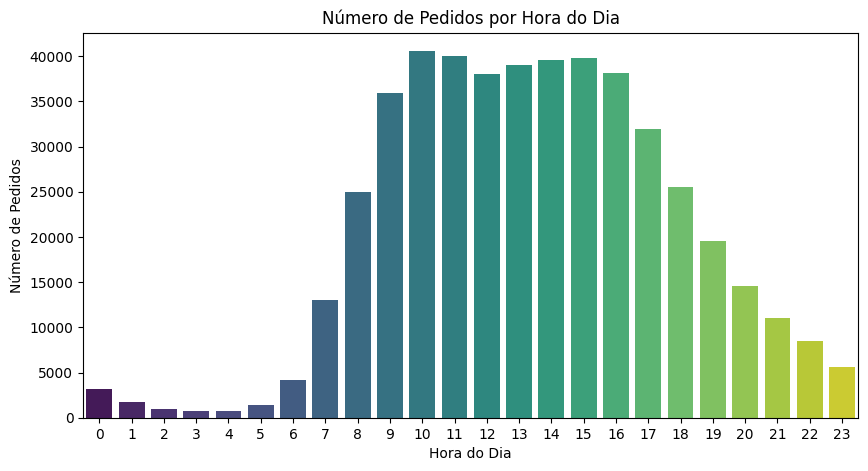

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

#pedidos por hora do dia
orders_by_hour = df_instacart['order_hour_of_day'].value_counts().sort_index()

#gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette="viridis")
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Pedidos")
plt.title("Número de Pedidos por Hora do Dia")
plt.xticks(range(0, 24))
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Sugestões de melhorias no gráfico acima: 
    

```python
from matplotlib import pyplot as plt

# Contar quantas pessoas fazem pedidos a cada hora do dia (contando valores únicos de 'user_id')
pedidos_por_hora = df_orders.groupby('order_hour_of_day')['user_id'].nunique()
print(pedidos_por_hora)


plt.figure(figsize=(12, 6))
pedidos_por_hora.plot(title="Número de Pedidos por Hora", kind='bar', color='yellow', xlabel='Horas do dia', ylabel= 'Número de pedidos')

``` 
    
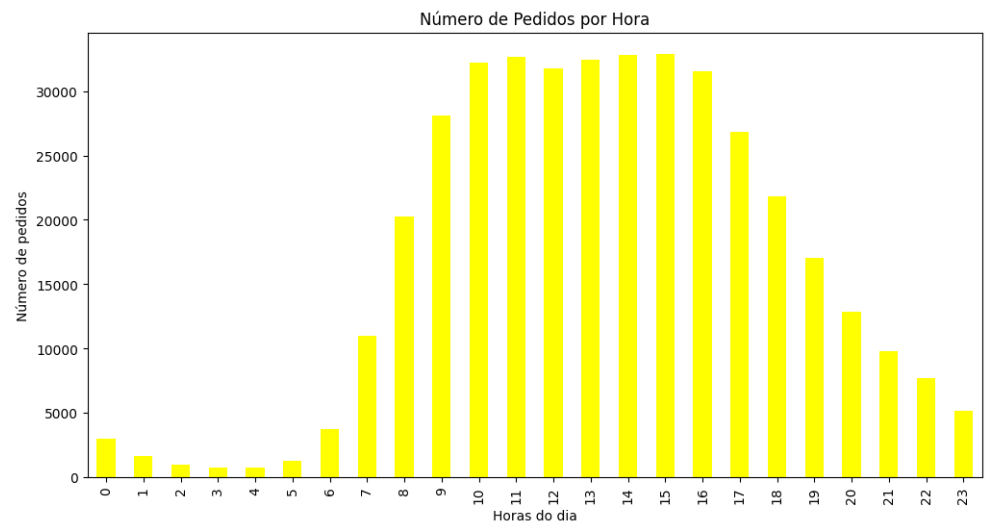
</div>

Escreva suas conclusões aqui

Deve haver picos de pedidos em horários específicos (como pela manhã e à noite) e uma queda na madrugada.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

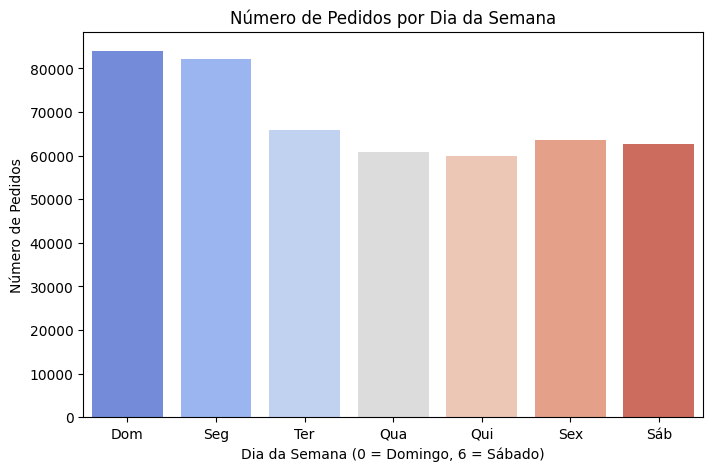

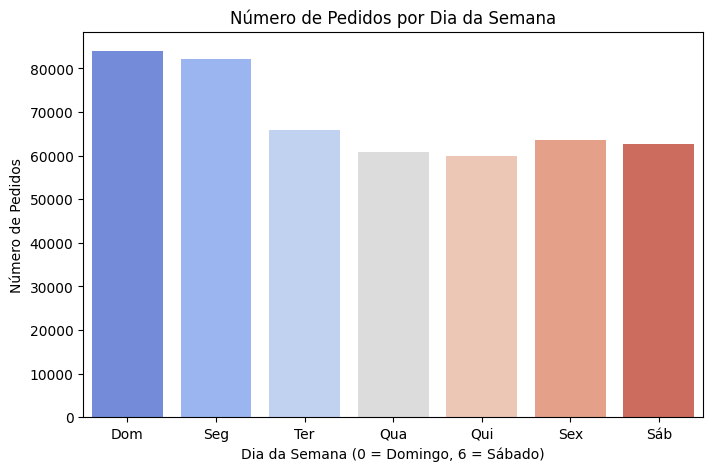

In [105]:
# Contar pedidos por dia da semana
orders_by_day = df_instacart['order_dow'].value_counts().sort_index()

# Criar gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="coolwarm")
plt.xlabel("Dia da Semana (0 = Domingo, 6 = Sábado)")
plt.ylabel("Número de Pedidos")
plt.title("Número de Pedidos por Dia da Semana")
plt.xticks(range(0, 7), ["Dom", "Seg", "Ter", "Qua", "Qui", "Sex", "Sáb"])
plt.show()
orders_by_day = df_instacart['order_dow'].value_counts().sort_index()

# Criar gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="coolwarm")
plt.xlabel("Dia da Semana (0 = Domingo, 6 = Sábado)")
plt.ylabel("Número de Pedidos")
plt.title("Número de Pedidos por Dia da Semana")
plt.xticks(range(0, 7), ["Dom", "Seg", "Ter", "Qua", "Qui", "Sex", "Sáb"])
plt.show()

Escreva suas conclusões aqui

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui
Podemos identificar os dias mais movimentados. Geralmente, sábado e domingo tendem a ter mais pedidos.

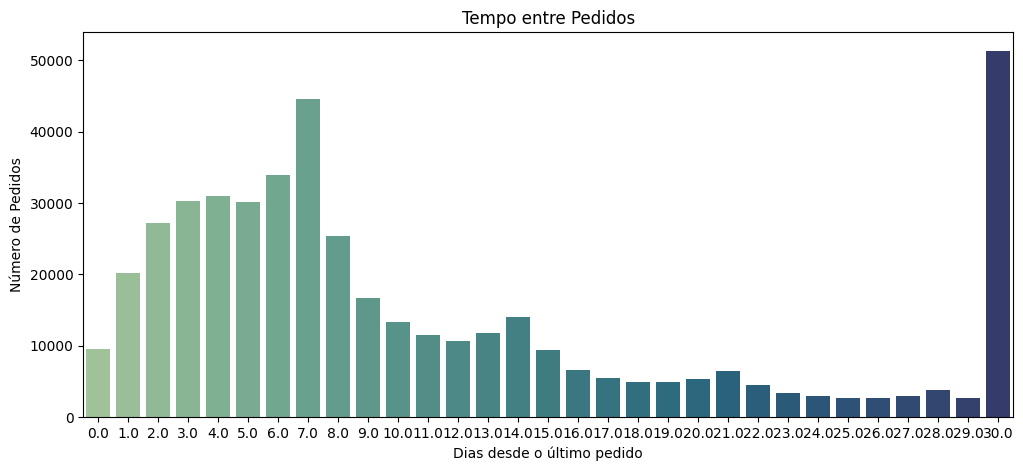

Tempo mínimo entre pedidos: 0.0 dias
Tempo máximo entre pedidos: 30.0 dias


In [ ]:
# Contar frequência dos dias entre pedidos
days_wait_counts = df_instacart['days_since_prior_order'].value_counts().sort_index()

# Criar gráfico
plt.figure(figsize=(12, 5))
sns.barplot(x=days_wait_counts.index, y=days_wait_counts.values, palette="crest")
plt.xlabel("Dias desde o último pedido")
plt.ylabel("Número de Pedidos")
plt.title("Tempo entre Pedidos")
plt.show()

#valores mínimo e máximo
min_days = df_instacart['days_since_prior_order'].min()
max_days = df_instacart['days_since_prior_order'].max()

print(f"Tempo mínimo entre pedidos: {min_days} dias")
print(f"Tempo máximo entre pedidos: {max_days} dias")

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>
    
Sugestão de melhoria:
    
Caso queira fazer o gráfico de uma forma mais rápida, pode utilizar o comando `hist`. Exemplo abaixo:
    
    
```python
    
plt.figure(figsize=(10,6))
orders_df['days_since_prior_order'].hist(bins=30, color='green', edgecolor='black')
plt.title('Tempo de Espera até o Próximo Pedido')
plt.xlabel('Dias')
plt.ylabel('Quantidade de Pedidos')
plt.show()

min_days = orders_df['days_since_prior_order'].min()
max_days = orders_df['days_since_prior_order'].max()

print("Mínimo de dias até o próximo pedido:", min_days)
print("Máximo de dias até o próximo pedido:", max_days)
    
```
    
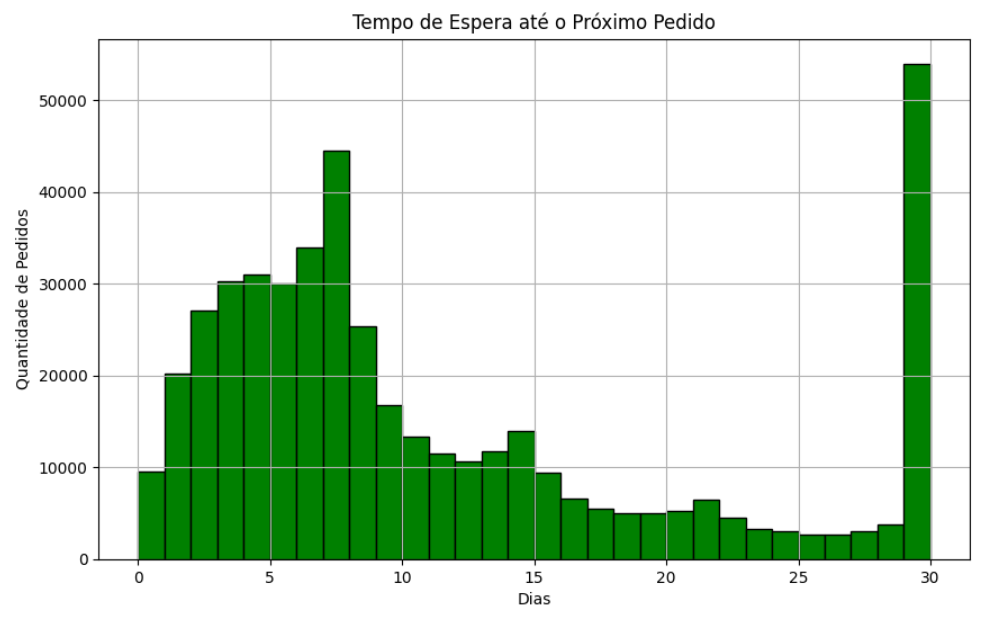 
    

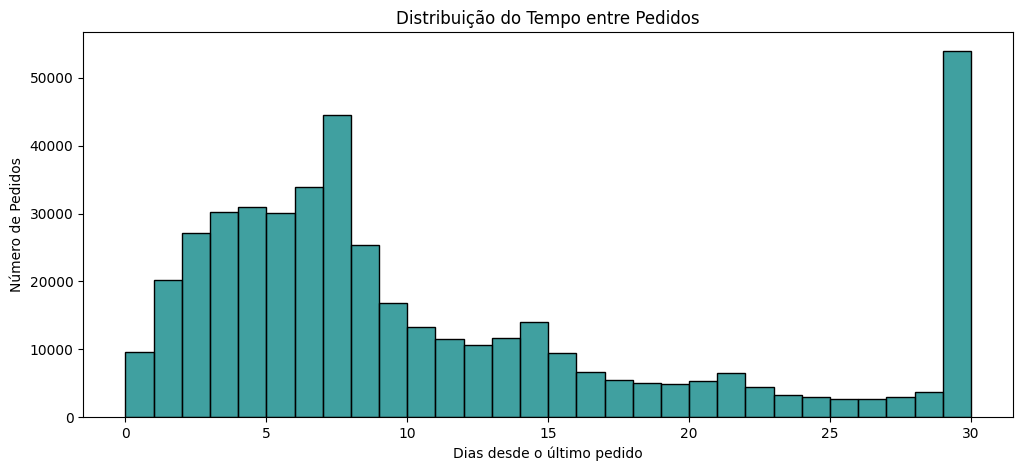

Tempo mínimo entre pedidos: 0.0 dias
Tempo máximo entre pedidos: 30.0 dias


In [ ]:
#Código gerado pela revisora 

import matplotlib.pyplot as plt
import seaborn as sns

# Dados para o histograma
days_wait = df_instacart['days_since_prior_order']

# Criar histograma
plt.figure(figsize=(12, 5))
sns.histplot(days_wait, bins=30, kde=False, color='teal', edgecolor='black')  # Ajuste o número de bins conforme necessário
plt.xlabel("Dias desde o último pedido")
plt.ylabel("Número de Pedidos")
plt.title("Distribuição do Tempo entre Pedidos")
plt.show()

# Valores mínimo e máximo
min_days = days_wait.min()
max_days = days_wait.max()

print(f"Tempo mínimo entre pedidos: {min_days} dias")
print(f"Tempo máximo entre pedidos: {max_days} dias")

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Todas as tarefas de nível fácil foram realizadas corretamente. Por favor apenas rode o código novamente com o dataframe df_instacart ajustado.
</div>



1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
wednesday_orders = df_instacart[df_instacart['order_dow'] == 3]
saturday_orders = df_instacart[df_instacart['order_dow'] == 6]

In [109]:
wednesday_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
6,2511640,148233,40,3,8,2.0
16,3109465,55090,19,3,15,9.0
28,133707,182261,1,3,10,NaN
30,1890318,193501,3,3,15,30.0
35,125325,106853,6,3,19,30.0
...,...,...,...,...,...,...
478917,972799,89702,4,3,7,10.0
478946,2406747,63101,11,3,8,5.0
478956,640934,27104,9,3,10,6.0
478963,3270802,112087,2,3,13,6.0


In [110]:
# Contar os pedidos por hora do dia
wednesday_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

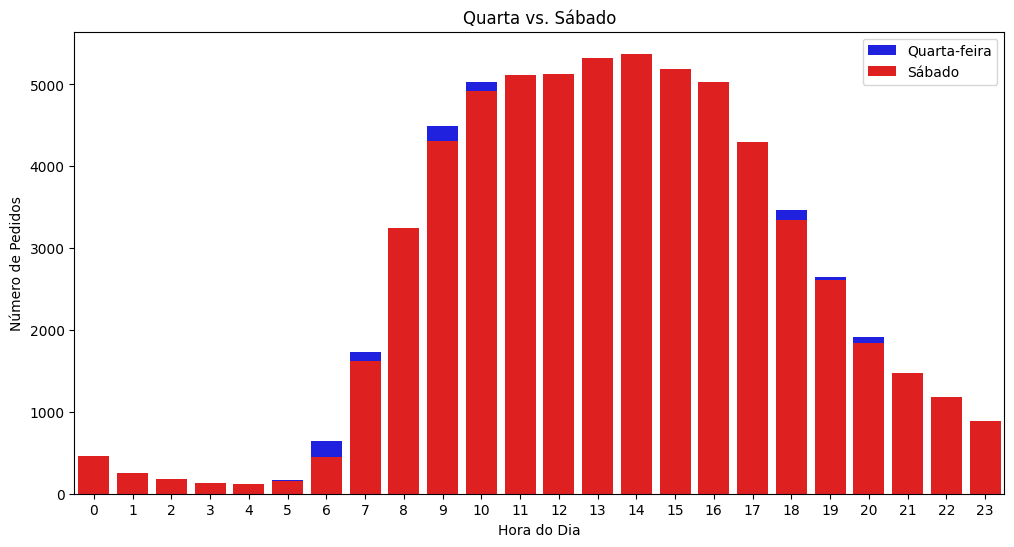

In [111]:
plt.figure(figsize=(12, 6))
sns.barplot(x=wednesday_counts.index, y=wednesday_counts.values, color="blue", label="Quarta-feira")
sns.barplot(x=saturday_counts.index, y=saturday_counts.values, color="red", label="Sábado")

plt.xlabel("Hora do Dia")
plt.ylabel("Número de Pedidos")
plt.title("Quarta vs. Sábado")
plt.legend()
plt.xticks(range(0, 24))
plt.show()

Escreva suas conclusões aqui

Diferenças esperadas entre quarta-feira e sábado
quarta-feira:

Picos de pedidos podem ocorrer por volta das 12h-13h (horário de almoço).
Outro pico no fim da tarde (17h-19h)
Menos pedidos durante a madrugada.

sábado:
Os pedidos podem começar a subir mais cedo (por volta das 9h-10h).
Um grande pico no começo da tarde (12h-15h)
O volume pode permanecer alto até a noite


### [B2] Qual é a distribuição do número de pedidos por cliente?

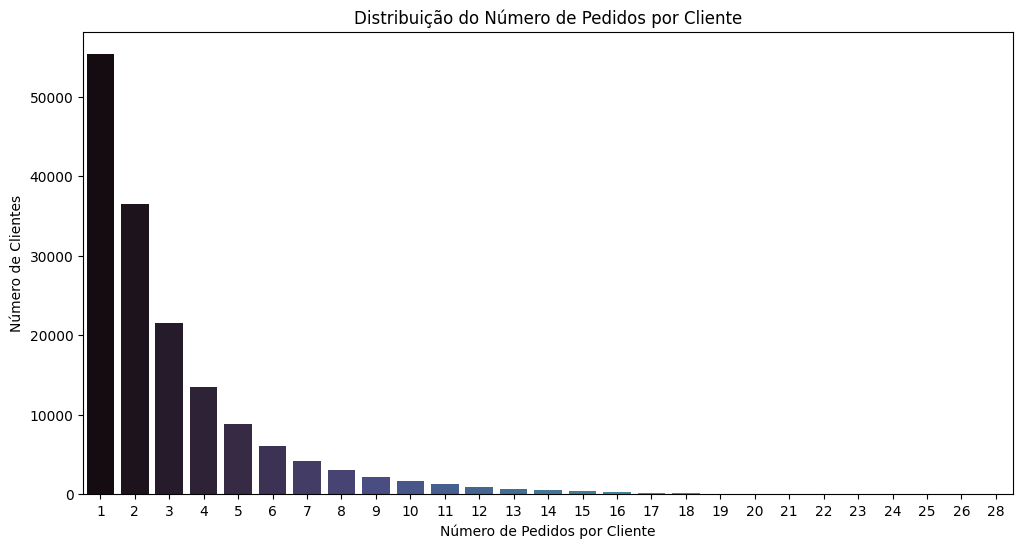

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar o número de pedidos por cliente
orders_per_user = df_instacart['user_id'].value_counts()

# Contar quantos usuários fizeram X pedidos
order_distribution = orders_per_user.value_counts().sort_index()

#gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=order_distribution.index, y=order_distribution.values, palette="mako")

plt.xlabel("Número de Pedidos por Cliente")
plt.ylabel("Número de Clientes")
plt.title("Distribuição do Número de Pedidos por Cliente")


plt.show()

Escreva suas conclusões aqui

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [ ]:
# Contar quantas vezes cada produto foi comprado
top_products = df_order_products['product_id'].value_counts().head(20)

#DataFrame com os IDs e a contagem
top_products_df = top_products.reset_index()
top_products_df.columns = ['product_id', 'count']

# Juntar com os nomes dos produtos
top_products_df = top_products_df.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

#20 produtos mais populares
print(top_products_df)

    product_id  count              product_name
0        24852  66050                    Banana
1        13176  53297    Bag of Organic Bananas
2        21137  37039      Organic Strawberries
3        21903  33971      Organic Baby Spinach
4        47209  29773      Organic Hass Avocado
5        47766  24689           Organic Avocado
6        47626  21495               Large Lemon
7        16797  20018              Strawberries
8        26209  19690                     Limes
9        27845  19600        Organic Whole Milk
10       27966  19197       Organic Raspberries
11       22935  15898      Organic Yellow Onion
12       24964  15292            Organic Garlic
13       45007  14584          Organic Zucchini
14       39275  13879       Organic Blueberries
15       49683  13675            Cucumber Kirby
16       28204  12544        Organic Fuji Apple
17        5876  12232             Organic Lemon
18        8277  11993  Apple Honeycrisp Organic
19       40706  11781    Organic Grape T

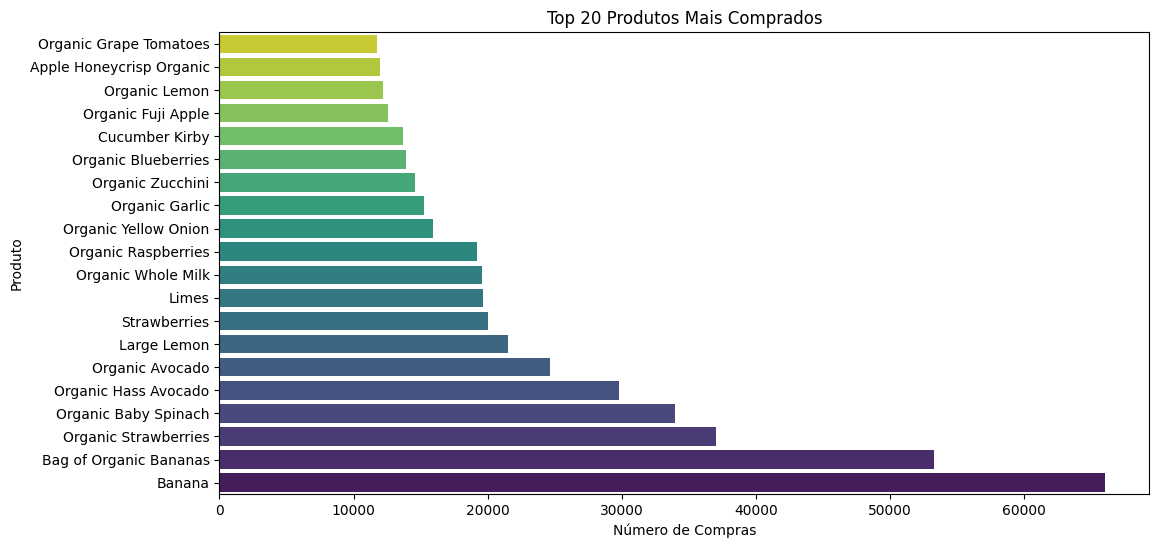

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#quantas vezes cada produto foi comprado
top_products = df_order_products['product_id'].value_counts().head(20)

top_products_df = top_products.reset_index()
top_products_df.columns = ['product_id', 'count']

top_products_df = top_products_df.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(y=top_products_df['product_name'], x=top_products_df['count'], palette="viridis")

plt.xlabel("Número de Compras")
plt.ylabel("Produto")
plt.title("Top 20 Produtos Mais Comprados")
plt.gca().invert_yaxis()  # Inverte a ordem 
plt.show()

Escreva suas conclusões aqui
produtos essenciais como bananas, leite, ovos e pão nos primeiros lugares.



1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar quantos produtos há em cada pedido
items_per_order = df_order_products.groupby('order_id')['product_id'].count()

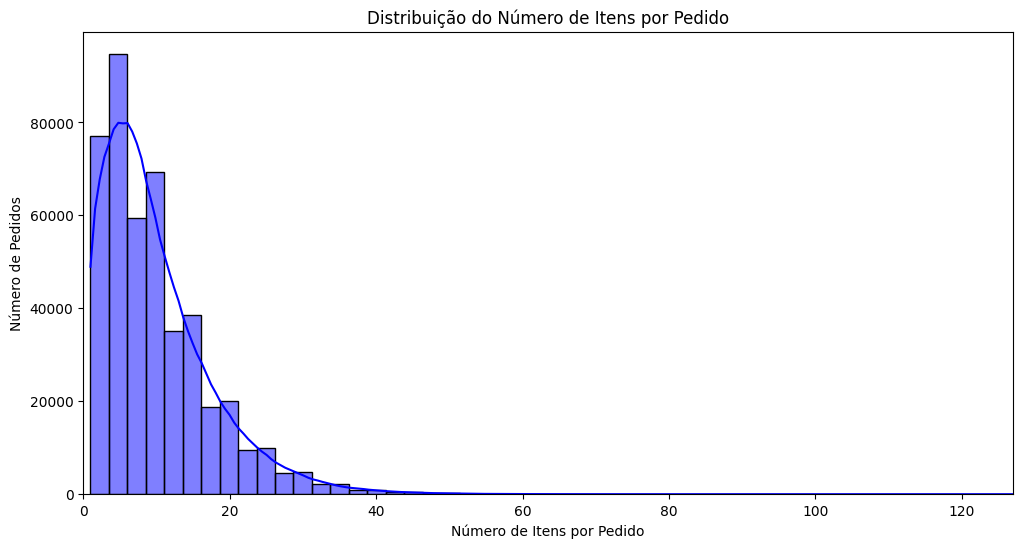

In [116]:
# distribuição
plt.figure(figsize=(12, 6))
sns.histplot(items_per_order, bins=50, kde=True, color="blue")
plt.xlabel("Número de Itens por Pedido")
plt.ylabel("Número de Pedidos")
plt.title("Distribuição do Número de Itens por Pedido")
plt.xlim(0, items_per_order.max()) 

plt.show()

Escreva suas conclusões aqui
a maioria dos pedidos tem um número moderado de itens entre 5 e 20 produtos
Pedidos pequenos são frequentes

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [117]:
# Filtrar apenas os pedidos repetidos (reordered == 1)
reordered_products = df_order_products[df_order_products['reordered'] == 1]

In [118]:
# Contar quantas vezes cada produto foi recomprado
top_reordered = reordered_products['product_id'].value_counts().head(20)

In [119]:
# Criar um DataFrame com os IDs e a contagem
top_reordered_df = top_reordered.reset_index()
top_reordered_df.columns = ['product_id', 'count']

In [120]:
# Juntar com os nomes dos produtos
top_reordered_df = top_reordered_df.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# Exibir os 20 produtos mais recorrentes em pedidos repetidos
print(top_reordered_df)

    product_id  count              product_name
0        24852  55763                    Banana
1        13176  44450    Bag of Organic Bananas
2        21137  28639      Organic Strawberries
3        21903  26233      Organic Baby Spinach
4        47209  23629      Organic Hass Avocado
5        47766  18743           Organic Avocado
6        27845  16251        Organic Whole Milk
7        47626  15044               Large Lemon
8        27966  14748       Organic Raspberries
9        16797  13945              Strawberries
10       26209  13327                     Limes
11       22935  11145      Organic Yellow Onion
12       24964  10411            Organic Garlic
13       45007  10076          Organic Zucchini
14       49683   9538            Cucumber Kirby
15       28204   8989        Organic Fuji Apple
16        8277   8836  Apple Honeycrisp Organic
17       39275   8799       Organic Blueberries
18        5876   8412             Organic Lemon
19       49235   8389       Organic Half

Escreva suas conclusões aqui
Produtos essenciais e de consumo diário provavelmente lideram a lista (exemplo: leite, ovos, pão, bananas).

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Tarefas de nível difícil foram realizadas corretamente.
</div>

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>  

Sugestão de como resolver o exercício:
    
```python    
# Realiza a junção dos dataframes 'order_products' e 'products' com base em uma chave comum
df_merge = order_products.merge(products)

# Calcula a taxa de reordenação (média de 'reordered') para cada produto, agrupando pelo 'product_id' e 'product_name'
reorder_rate = df_merge.groupby(['product_id', 'product_name'])['reordered'].mean()

# Exibe a taxa de reordenação calculada para cada produto
reorder_rate

```

In [121]:
df_merge = df_order_products.merge(df_products)
reorder_rate = df_merge.groupby(['product_id', 'product_name'])['reordered'].mean()
reorder_rate

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Escreva suas conclusões aqui

1.Produtos com alta taxa de reordenação (próximos de 1) indicam itens que os clientes costumam comprar repetidamente;
2Produtos com baixa taxa de reordenação (próximos de 0) são itens comprados menos vezes, esse valor pode incluir por exemplo produtos teste.

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [122]:
# Contar o número total de pedidos para cada cliente
total_pedidos_por_cliente = df_instacart['user_id'].value_counts()

# Contar o número de pedidos repetidos para cada cliente
pedidos_repetidos_por_cliente = df_order_products[df_order_products['reordered'] == 1]['order_id'].value_counts()

# Calcular a proporção de pedidos repetidos para cada cliente
proporcao_pedidos_repetidos_cliente = pedidos_repetidos_por_cliente / total_pedidos_por_cliente

# Criar uma tabela com as colunas de ID do cliente e a proporção de pedidos repetidos
tabela_proporcao_repetidos_cliente = pd.DataFrame({
        'user_id': proporcao_pedidos_repetidos_cliente.index,
        'proporcao_repetidos': proporcao_pedidos_repetidos_cliente.values
    })

# Exibir a tabela
print(tabela_proporcao_repetidos_cliente)

        user_id  proporcao_repetidos
0             2                  NaN
1             4                  6.0
2             5                  NaN
3             6                  NaN
4             7                  NaN
...         ...                  ...
535073  3421013                  NaN
535074  3421018                  NaN
535075  3421034                  NaN
535076  3421053                  NaN
535077  3421071                  NaN

[535078 rows x 2 columns]


### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [123]:
# Ordena os dados de pedidos por 'order_id' e 'add_to_cart_order' e seleciona o primeiro item de cada pedido
first_items = df_order_products.sort_values(by=['order_id', 'add_to_cart_order']).groupby('order_id').first().reset_index()

# Conta a frequência dos produtos que aparecem primeiro nos pedidos, pegando os 20 mais frequentes
first_item_counts = first_items['product_id'].value_counts().head(20).reset_index()
first_item_counts.columns = ['product_id', 'count']  # Renomeia as colunas para 'product_id' e 'count'

# Faz o merge com o dataframe de produtos para obter os nomes dos produtos
top_first_items = first_item_counts.merge(df_products, on='product_id')

# Exibe os 20 principais itens colocados nos carrinhos antes de todos os outros
print("Os 20 principais itens colocados nos carrinhos antes de todos os outros:")
print(top_first_items[['product_id', 'product_name', 'count']])

Os 20 principais itens colocados nos carrinhos antes de todos os outros:
    product_id                 product_name  count
0        24852                       Banana  15562
1        13176       Bag of Organic Bananas  11026
2        27845           Organic Whole Milk   4363
3        21137         Organic Strawberries   3946
4        47209         Organic Hass Avocado   3390
5        21903         Organic Baby Spinach   3336
6        47766              Organic Avocado   3044
7        19660                 Spring Water   2336
8        16797                 Strawberries   2308
9        27966          Organic Raspberries   2024
10       44632   Sparkling Water Grapefruit   1914
11       49235          Organic Half & Half   1797
12       47626                  Large Lemon   1737
13         196                         Soda   1733
14       38689     Organic Reduced Fat Milk   1397
15       26209                        Limes   1370
16       12341                Hass Avocados   1340
17       